<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/Simply_Write/6_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
# Mnist 데이터세트 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 생성
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = "relu"),
                    Dense(10, activation = "softmax")
])

In [ ]:
# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
# 훈련(학습)
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 5, batch_size = 64)

Epoch 1/5
750/750 [==============================] - 5s 2ms/step - loss: 4.5305 - accuracy: 0.7657 - val_loss: 0.8487 - val_accuracy: 0.8077
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.6843 - accuracy: 0.8371 - val_loss: 0.5703 - val_accuracy: 0.8597
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.4712 - accuracy: 0.8822 - val_loss: 0.4567 - val_accuracy: 0.8992
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3663 - accuracy: 0.9065 - val_loss: 0.4334 - val_accuracy: 0.9016
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3124 - accuracy: 0.9199 - val_loss: 0.3230 - val_accuracy: 0.9212


In [ ]:
# 평가(정확도)
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Data Accuracy: ", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.9191
Test Data Accuracy:  0.9190999865531921


Text(0, 0.5, 'accuarcy')

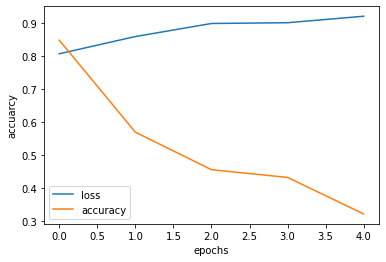

In [ ]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.legend(history.history, loc = "lower left")
plt.xlabel("epochs")
plt.ylabel("accuarcy")

In [ ]:
# 에측
predictions = model.predict(x_test) # x_test = 10,000 개의 data

# 첫 번째 데이터 예측 결과값
predictions[0]

array([2.3210843e-28, 3.3778795e-09, 8.3441137e-13, 6.7951157e-12,
       1.2481287e-15, 2.6947668e-27, 1.8429348e-10, 1.0000000e+00,
       1.5700140e-29, 4.3740549e-12], dtype=float32)

## 표현 방식 변경(소수점 두자리)
## => 위의 결과가 부동 소수점(1e-2 이런 형태)라서 고정 소수점 형태로 변겅 

In [ ]:
import numpy as np

np.set_printoptions(formatter = {"float_kind": lambda x: "{0:02f}".format(x)})

# 첫 번쨰 데이터 예측 결과값
predictions[0]

array([0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 1.000000, 0.000000, 0.000000], dtype=float32)

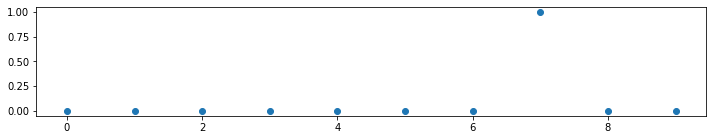

In [ ]:
plt.figure(figsize = (12, 2))
plt.plot(predictions[0], "o")

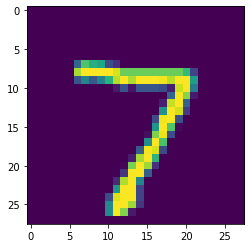

In [ ]:
plt.imshow(x_test[0]) # 7일 확률이 제일 크다.